Homework 4: Part 1

In [2]:
%matplotlib inline

import numpy as np #import numpy package as np
import pandas as pd #import pandas package as pd
from sklearn.datasets import load_wine #import wine dataset from sci-kit learn 

import matplotlib.pyplot as plt #import pyplot as plt

In [6]:
wine = load_wine() # load wine dataset
print(wine.target) # view wine target data

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Target data includes 0, 1, and 2; so three classes to group by.

In [7]:
wine.feature_names # view wine feature names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Dataset has 13 feature names

In [8]:
wine.target_names #Look at names for targets

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Couldn't find actual names online so I'll just stick with Classes for now

In [9]:
X = wine.data #Set x as wine data
y = wine.target #Set y as target 

print(np.shape(X)) #Print x shape
print(np.shape(y)) #Print y shape

(178, 13)
(178,)


x and y both have 178 observations but x has 13 columns

In [10]:
# Split wine data in train and test data (60:40)

from sklearn.model_selection import train_test_split #import train_test_split from scikit learn package

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=7) #load test size as 40 and random state as 7

In [11]:
# scale the training data

from sklearn.preprocessing import StandardScaler #import scaler from scikit learn package
scaler = StandardScaler() #define scaler
scaler.fit(X_train) #fit scaler to x_train

X_train = scaler.transform(X_train) #establish scaled x_train
X_test = scaler.transform(X_test) #establish scaled x_test

In [12]:
from sklearn.neural_network import MLPClassifier #load MLP Classifier from scikitlearn

# now build the model using MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=9) 
#Define model with 3 hidden layers with 10 nodes each 
# Set max iterations to 1000 and random state to 9

mlp.fit(X_train, y_train) # now fit the classifer to the training data

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, random_state=9)

Seems to work fine with current settings

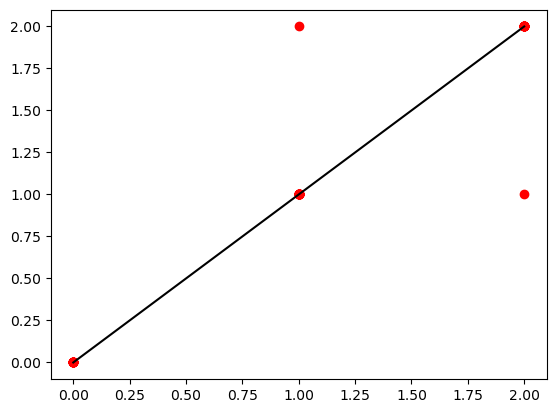

In [9]:
predictions = mlp.predict(X_test) #Assign prediction to test data based on training data

plt.plot(y_test, predictions, 'ro') #Plot testing data
plt.plot([0, 2], [0, 2],'k') #Since data only ranges from 0-2

Appears that predictions aren't perfect which makes sense. 

Examine this more closely now with a confusion matrix

In [10]:
from sklearn.metrics import classification_report, confusion_matrix #import confusion matrix from scikit learn

print(confusion_matrix(y_test,predictions)) #Print confusion matrix
print(classification_report(y_test,predictions)) #Print classification report

[[19  0  0]
 [ 0 31  1]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      0.97      0.97        32
           2       0.95      0.95      0.95        21

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



Looks like the model works very well at this point, espeically for the 0-class. However, likely the model can be imporved. 

Time to examine whether adjusting the number of layers and nodes leads to a better model! 

Homework 4: Part 2

In [63]:
scores = {} # First define a blank scores array
scores_list = [] #Now define a blank scores list
l_range = range(1, 11, 1) #Now define a range for layers that increase by 1 for nodes 1-10

from sklearn import metrics #import metrics from sci kit learn package

for l in l_range: #create function that examines 1 hidden layer with between 1 and 10 nodes
    print(l) #print l (meaning # of nodes)
    mlp = MLPClassifier(hidden_layer_sizes=(l), max_iter=1000, random_state=9) 
    # define model with1000 iterations and random state 9
    mlp.fit(X_train, y_train) #fit training data to defined model
    y_pred = mlp.predict(X_test) #predict based on training data
    scores[l] = metrics.accuracy_score(y_test,y_pred) #load accuracy metric
    scores_list.append(metrics.accuracy_score(y_test,y_pred)) #append accuracy metric
scores #list defined scores

1


C:\Users\zacha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


2


C:\Users\zacha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


3


C:\Users\zacha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


4


C:\Users\zacha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


5
6
7
8
9
10


{1: 0.5416666666666666,
 2: 0.9583333333333334,
 3: 0.9722222222222222,
 4: 0.9444444444444444,
 5: 0.9722222222222222,
 6: 0.9305555555555556,
 7: 0.9722222222222222,
 8: 0.9722222222222222,
 9: 0.9861111111111112,
 10: 0.9722222222222222}

Max iterations does not seem to be high enough. Switched to 3500 and repeated 

In [67]:
scores = {}
scores_list = []
l_range = range(1, 11, 1)

from sklearn import metrics

for l in l_range:
    print(l)
    mlp = MLPClassifier(hidden_layer_sizes=(l), max_iter=3500, random_state=9) #iterations now 3500
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores[l] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

1
2
3
4
5
6
7
8
9
10


{1: 0.6666666666666666,
 2: 0.8194444444444444,
 3: 1.0,
 4: 0.9722222222222222,
 5: 0.9722222222222222,
 6: 0.9166666666666666,
 7: 0.9444444444444444,
 8: 0.9583333333333334,
 9: 0.9722222222222222,
 10: 0.9722222222222222}

Very interesting variation in the accuracy scores...a little hard to interpret. Will look closer at the confusion matrix for nodes 3-5 since this seems to be where model is best before trailing off but then rising again likely due to overfitting? 

In [74]:
# Look at model with 3 nodes

mlp = MLPClassifier(hidden_layer_sizes=(3), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [75]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 31  1]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      0.97      0.97        32
           2       0.95      0.95      0.95        21

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



Although accuracy score says this model should have 100% accuracy...this model does not seem to be at this level. Still performs well though but very odd.

In [76]:
# Look at model with 4 nodes

mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [77]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 2 30  0]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.97      0.94      0.95        32
           2       1.00      0.95      0.98        21

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



Model with 3 nodes seems superior.

In [78]:
# Look at model with 5 nodes

mlp = MLPClassifier(hidden_layer_sizes=(4), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [79]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 2 30  0]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.97      0.94      0.95        32
           2       1.00      0.95      0.98        21

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



Model with 3 nodes still seems best. 4 nodes and 5 nodes seem to perform at same level.

Will plot out to look even more closely

Text(0, 0.5, 'accuracy score')

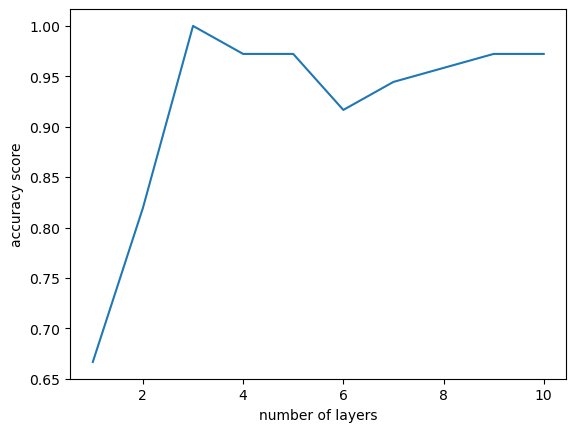

In [68]:
# plot the model accuracy for each value of k

plt.plot(l_range,scores_list) #load accuracy on the y axis and number of layers on the x
plt.xlabel('number of layers') #label x axis
plt.ylabel('accuracy score') #label y axis

Still a little hard to interpret...but seems like it may be worth excluding nodes 1 and 2. Best range still likely nodes 3-5. Will focus on these nodes and expand the number of layers.

In [14]:
scores = {}
scores_list = []
a = range(3, 6, 1) # now layer 1 is defined to have between 3-5 nodes and increase by an increment of 1
b = range(3, 6, 1) # new layers 2 is now included and also defined to have between 3-5 nodes and increase by an increment of 1

from sklearn import metrics

for layer_1 in a: # define loop function
    for layer_2 in b: #define loop within a loop to examine all the assortments of nodes/layers
                    mlp = MLPClassifier(hidden_layer_sizes=(layer_1, layer_2), max_iter=3500, random_state=9)
                    mlp.fit(X_train, y_train)
                    y_pred = mlp.predict(X_test)
                    scores[layer_1, layer_2] = metrics.accuracy_score(y_test,y_pred) 
                    #this time print two layers/nodes and accruacy score
                    scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

{(3, 3): 0.9722222222222222,
 (3, 4): 0.9444444444444444,
 (3, 5): 0.9861111111111112,
 (4, 3): 0.9444444444444444,
 (4, 4): 0.9722222222222222,
 (4, 5): 0.9583333333333334,
 (5, 3): 0.9861111111111112,
 (5, 4): 0.9722222222222222,
 (5, 5): 0.9305555555555556}

Top Performers

(3, 3): 0.9722222222222222

(3, 5): 0.9861111111111112

(4, 4): 0.9722222222222222

(5, 3): 0.9861111111111112

(5, 4): 0.9722222222222222

Examine these more closely

In [69]:
#Load in model based on two layers with 3 nodes each and then print confusion matrix with classification report

mlp = MLPClassifier(hidden_layer_sizes=(3,3), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [37]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 31  1]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      0.97      0.97        32
           2       0.95      0.95      0.95        21

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



Seems comparable with model with 1 layer with 3 nodes.

In [80]:
# Load model with two layers with 3 and 5 nodes
mlp = MLPClassifier(hidden_layer_sizes=(3,5), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [81]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 31  1]
 [ 0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.97      0.98        32
           2       0.95      1.00      0.98        21

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



Model with two layers and 3 and 5 nodes seems to be the best so far

In [82]:
# load model with two layers with 4 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(4,4), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [83]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 31  1]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      0.97      0.97        32
           2       0.95      0.95      0.95        21

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



Solid model but not as good as model with two layers and 3 and 5 nodes.

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(5,3), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [85]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 31  1]
 [ 0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.97      0.98        32
           2       0.95      1.00      0.98        21

    accuracy                           0.99        72
   macro avg       0.98      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



This model matches model with two layers and 3 and 5 nodes.

In [86]:
#load model with two layers with 4 and 5 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5,4), max_iter=2500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [87]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 1 30  1]
 [ 0  0 21]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.94      0.97        32
           2       0.95      1.00      0.98        21

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72



This model doesn't stack up with the other two models. So after this round the two best models are:
(3, 5)
(5, 3)

Look at all top performers plotted out now

Text(0, 0.5, 'accuracy score')

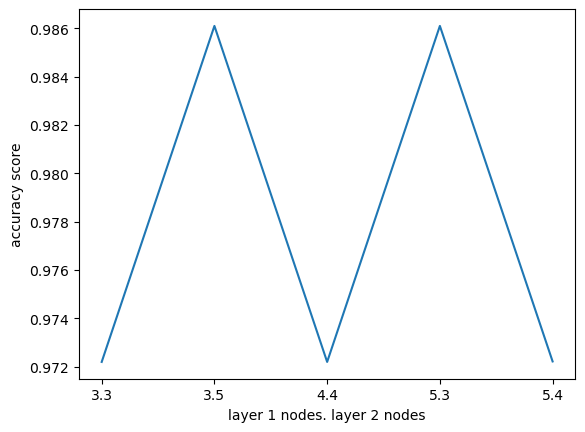

In [21]:
# plot the model accuracy for each top performer

a = ('3.3', '3.5', '4.4', '5.3', '5.4')
b = (0.9722, 0.9861, 0.9722, 0.9861, 0.97222)

plt.plot(a,b) #load accuracy on the y axis and number of layers on the x
plt.xlabel('layer 1 nodes. layer 2 nodes') #label x axis
plt.ylabel('accuracy score') #label y axis

Now I'll move on to three layers.

In [46]:
# now build a loop to test how well different number of hidden layers performs

scores = {}
scores_list = []
a = range(3, 6, 1) # layer 1 remains the same
b = range(3, 6, 1) # layer 2 remains the same
c = range(3, 6, 1) # new layer 3 is now included and defined to have between 3-5 nodes and increase by an increment of 1

for layer_1 in a: #loop 1
    for layer_2 in b: #loop 2
        for layer_3 in c: #now a third loop that adds the third layer
                    mlp = MLPClassifier(hidden_layer_sizes=(layer_1, layer_2, layer_3), max_iter=3500, random_state=9)
                    mlp.fit(X_train, y_train)
                    y_pred = mlp.predict(X_test)
                    scores[layer_1, layer_2,layer_3] = metrics.accuracy_score(y_test,y_pred)
                    #this time print three layers/nodes and accruacy score
                    scores_list.append(metrics.accuracy_score(y_test,y_pred))
scores

{(3, 3, 3): 1.0,
 (3, 3, 4): 0.9583333333333334,
 (3, 3, 5): 0.9583333333333334,
 (3, 4, 3): 0.7222222222222222,
 (3, 4, 4): 0.5277777777777778,
 (3, 4, 5): 0.9444444444444444,
 (3, 5, 3): 0.9027777777777778,
 (3, 5, 4): 0.9722222222222222,
 (3, 5, 5): 0.9722222222222222,
 (4, 3, 3): 0.2638888888888889,
 (4, 3, 4): 0.9444444444444444,
 (4, 3, 5): 0.9583333333333334,
 (4, 4, 3): 0.9722222222222222,
 (4, 4, 4): 0.9722222222222222,
 (4, 4, 5): 0.9722222222222222,
 (4, 5, 3): 0.9722222222222222,
 (4, 5, 4): 0.9722222222222222,
 (4, 5, 5): 0.9722222222222222,
 (5, 3, 3): 0.9583333333333334,
 (5, 3, 4): 0.9583333333333334,
 (5, 3, 5): 0.9583333333333334,
 (5, 4, 3): 0.9583333333333334,
 (5, 4, 4): 0.9722222222222222,
 (5, 4, 5): 0.9861111111111112,
 (5, 5, 3): 0.9027777777777778,
 (5, 5, 4): 0.9861111111111112,
 (5, 5, 5): 0.9722222222222222}

Top 3

(3, 3, 3): 1.0

(5, 4, 5): 0.9861111111111112

(5, 5, 4): 0.9861111111111112

Model (3,3,3) having 100% seems a little odd but doesn't seem to be something due to overfitting. Will examine first.

In [88]:
# Load model with 3 layers and 3 nodes each
mlp = MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [89]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 32  0]
 [ 0  0 21]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00        21

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



This model appears to be the real deal...perfect accuracy, recall, and f1-score. Will now plot this out to look closer.

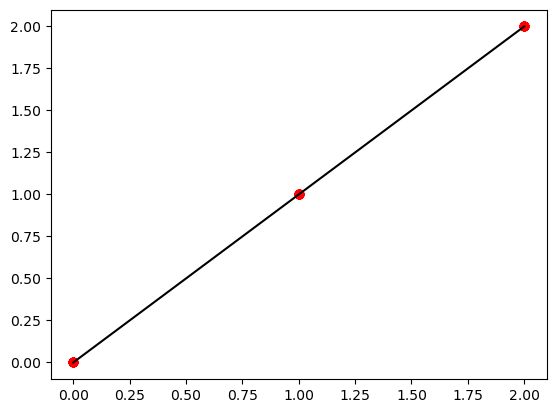

In [61]:
# try makign some predictions using your classifier
predictions = mlp.predict(X_test) #predict testing data based on model

plt.plot(y_test, predictions, 'ro') 
plt.plot([0, 2], [0, 2],'k')

Seems legitmate...but will continue to examine data with 3 layers.

In [90]:
# load 3 layers with 5, 4, and 5 nodes
mlp = MLPClassifier(hidden_layer_sizes=(5, 4, 5), max_iter=3500, random_state=9)

# now fit the classifer to the training data
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [56]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 32  0]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      1.00      0.98        32
           2       1.00      0.95      0.98        21

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



Really great model but can't compare with the 100% 3,3,3 model.

In [91]:
# load 3 layers with 5, 5, and 4 nodes
mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 4), max_iter=3500, random_state=9)

# now fit the classifer to the training data
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

In [92]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[19  0  0]
 [ 0 32  0]
 [ 0  1 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.97      1.00      0.98        32
           2       1.00      0.95      0.98        21

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



Another great model but still doesn't compare with 3,3,3 model

Let's compare all the best models from each round:

Text(0, 0.5, 'accuracy score')

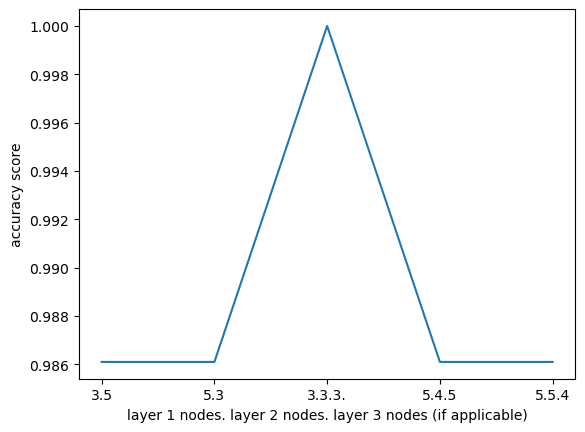

In [22]:
# plot the model accuracy for each top performer

a = ('3.5', '5.3', '3.3.3.', '5.4.5', '5.5.4')
b = (0.9861, 0.9861, 1.00, 0.9861, 0.9861)

plt.plot(a,b) #load accuracy on the y axis and number of layers on the x
plt.xlabel('layer 1 nodes. layer 2 nodes. layer 3 nodes (if applicable)') #label x axis
plt.ylabel('accuracy score') #label y axis

3,3,3 model will be the one I use for the unknown samples

Homework 4: Part 3

In [96]:
UNK_wine = pd.read_csv('C:/Users/zacha/Dropbox/PhD ODU/Courses/Spring 2023/OEAS895/HW4/unknown_wine.csv',sep=',') 
#load unknown wine data set

In [98]:
UNK_wine #Examine dataset

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,2.480115,1.577093,1.766757,7.542816,43.456511,0.569810,0.075239,0.267335,0.744527,0.975456,0.741519,2.763938,1228.781864
1,1.074171,1.125832,2.557246,4.421963,57.339151,1.677453,1.027255,0.266734,1.037521,6.093875,0.400008,2.629353,620.263632
2,3.516777,0.819709,0.462774,2.328977,60.776751,0.950360,2.312480,0.114245,1.453748,1.566772,0.249111,0.948954,417.939695
3,13.189798,1.402826,0.153316,7.621558,0.440191,0.103332,2.878385,0.016165,1.558074,5.961709,0.338151,1.608835,233.606713
4,11.973053,1.838887,0.945975,1.269000,83.484182,0.934233,0.448263,0.038872,0.488293,4.358916,0.482324,0.084788,387.198226
5,2.284138,0.048992,0.211198,4.088945,18.957613,1.192519,1.647511,0.005231,1.038589,2.101098,0.237541,1.672787,121.134473
6,9.463899,0.787199,1.863438,16.869074,31.736868,1.470403,0.534720,0.206582,0.633736,4.444610,0.033384,0.925355,328.508943
7,6.453939,1.676532,2.153574,13.765152,70.390073,1.749210,2.721021,0.252128,0.152867,0.582114,0.507068,2.055239,59.729064
8,12.740552,2.854646,0.932969,8.626371,44.557706,0.405552,1.105890,0.219005,0.393723,2.706763,0.983953,1.070769,250.301469
9,9.686586,1.232883,1.475132,3.560106,12.221049,1.229565,1.495698,0.153813,0.886209,1.506817,0.939698,0.921325,187.457035


In [99]:
UNK_wine.columns #look at columns 

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

Data appears to have same number of columns/variables and 9 observations.

In [100]:
# Re-load the 'perfect' model to apply to unknown data later
mlp = MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=3500, random_state=9)

mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(3, 3, 3), max_iter=3500, random_state=9)

In [101]:
UNK_wine_scaled = scaler.transform(UNK_wine) #scale unknown wine data set

C:\Users\zacha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [111]:
predictions = mlp.predict(UNK_wine_scaled) #make predictions

classes = {0:'Wine_Class_1',1:'Wine_Class_2',2:'Wine_Class_3'} #define wine classes

y_predict = mlp.predict(UNK_wine_scaled) #Predict based on defined model and scaled unknown wine dataset

In [112]:
print(classes[y_predict[0]]) #print class of unknown wine 1
print(classes[y_predict[1]]) #print class of unknown wine 2
print(classes[y_predict[2]]) #print class of unknown wine 3
print(classes[y_predict[3]]) #print class of unknown wine 4
print(classes[y_predict[4]]) #print class of unknown wine 5
print(classes[y_predict[5]]) #print class of unknown wine 6
print(classes[y_predict[6]]) #print class of unknown wine 7
print(classes[y_predict[7]]) #print class of unknown wine 8
print(classes[y_predict[8]]) #print class of unknown wine 9

Wine_Class_2
Wine_Class_2
Wine_Class_2
Wine_Class_2
Wine_Class_3
Wine_Class_2
Wine_Class_2
Wine_Class_2
Wine_Class_2


Seems to heavily lean towards Class 2...could be possible but likely off.

Will now use predict probability to determine how likely these are to be correct

In [116]:
mlp.predict_proba(UNK_wine_scaled) #apply predict probability to look how likely these predictions are based on model

array([[1.68688528e-37, 1.00000000e+00, 2.93725567e-22],
       [5.88038731e-31, 1.00000000e+00, 2.96090325e-18],
       [1.81833437e-39, 1.00000000e+00, 2.84672674e-24],
       [7.23943271e-21, 9.99999998e-01, 2.06840829e-09],
       [5.29805192e-07, 7.69134707e-04, 9.99230335e-01],
       [1.44211779e-52, 1.00000000e+00, 4.62848229e-32],
       [3.85944218e-27, 1.00000000e+00, 7.77714155e-12],
       [2.03525980e-31, 1.00000000e+00, 3.55784547e-18],
       [1.31905499e-18, 9.99999945e-01, 5.51945045e-08],
       [1.06567028e-25, 1.00000000e+00, 1.01106698e-12]])

Based on this, it seems like these classes are highly likely to be correct. 

In summary: 

Part 1 - Constructed a model to predict the classes of wine based on the 'wine' dataset. Used generic approach with 1000 iterations and 3 hidden layers with 10 nodes each. 

Part 2 - Fine tuned model by trying different combinations of hidden layers and nodes. First attempted to look at model using just one hidden layer and 1-10 nodes. This approach suggested that it was likely that including nodes 3-5 would be best. Based on this, added a second hidden layer and again used nodes 3-5. This slightly improved the model. Finally, added a third hidden layer and again nodes 3-5 for this layer. This led to the best model: 3 hidden layers with 3 nodes each. 

Part 3 - Applied best model to unknown dataset of wines. THis resulted in predictions that all the wines belonged to CLass 2 (technically class 1 with Python's setup) with one wine beloning to Class 3 (technically class 2) - unknown wine 4. Using the predict probability feature, it seems highly likely (99%-100%) that these predictions are accurate despite leaning heavily towards Class 2. 

Conclusion - Since this model appears to be 'perfect', it is possible that the model is 'overfitted' but this seems unlikely because it's only 3 hidden layers with 3 nodes each. Although my understanding of this type of modeling is limited, it would seem more likely that an overfitted model would have 12 layers and like 24 nodes each. 